In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import os
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score

pd.set_option('display.max_rows', 50)
%matplotlib inline

In [2]:
sns.set(style='whitegrid', palette='muted',
        rc={'figure.figsize': (16,9),
            'font.family': 'serif'})

In [3]:
path = 'data/goodbooks-10K/'
df = pd.read_csv(path+'predictions.csv')
df.head()

,book_id,original_title,language_code,adult,adult-fiction,adventure,book-club,contemporary,fantasy,fiction,...,adult_pred,adult-fiction_pred,adventure_pred,book-club_pred,contemporary_pred,fantasy_pred,fiction_pred,mystery_pred,romance_pred,young-adult_pred
0,4896,Second Grave on the Left,en-US,1,1,0,0,1,1,1,...,1,0,1,1,0,0,1,0,0,0
1,4782,Метро 2033,ger,1,0,1,0,1,1,1,...,1,0,1,0,0,1,1,0,0,1
2,1496,The Borrowers Afield,0,0,0,1,0,0,1,1,...,1,1,0,0,1,0,1,0,1,0
3,1957,Destined,eng,0,0,0,0,0,1,1,...,1,0,0,1,0,0,1,0,0,0
4,9171,アンダーグラウンド [Andāguraundo],eng,1,0,0,1,1,0,1,...,1,1,0,1,1,0,1,0,0,0


In [5]:
train = df['test']==0
test = df['test']==1

In [4]:
df.mean()

book_id               4999.5000
adult                    0.6604
adult-fiction            0.4775
adventure                0.3661
book-club                0.4365
contemporary             0.5287
fantasy                  0.4259
fiction                  0.9097
mystery                  0.3686
romance                  0.4251
young-adult              0.3630
test                     0.1000
adult_pred               0.9869
adult-fiction_pred       0.5143
adventure_pred           0.2020
book-club_pred           0.3200
contemporary_pred        0.5721
fantasy_pred             0.3400
fiction_pred             1.0000
mystery_pred             0.2134
romance_pred             0.3716
young-adult_pred         0.0433
dtype: float64

In [7]:
y_train = df[train].iloc[:,3:13]
y_test = df[test].iloc[:,3:13]

In [12]:
print(classification_report(y_test, df[test].iloc[:,-10:], target_names=y_test.columns))

               precision    recall  f1-score   support

        adult       0.66      0.99      0.79       660
adult-fiction       0.48      0.51      0.50       495
    adventure       0.36      0.20      0.26       342
    book-club       0.46      0.26      0.34       481
 contemporary       0.53      0.61      0.56       537
      fantasy       0.39      0.38      0.39       372
      fiction       0.90      1.00      0.95       901
      mystery       0.36      0.20      0.26       368
      romance       0.42      0.41      0.41       410
  young-adult       0.26      0.03      0.05       363

    micro avg       0.59      0.55      0.57      4929
    macro avg       0.48      0.46      0.45      4929
 weighted avg       0.54      0.55      0.53      4929
  samples avg       0.61      0.55      0.54      4929



In [15]:
pd.DataFrame(confusion_matrix(y_test.adult, df[test].iloc[:,-10:].adult_pred))

,0,1
0,4,336
1,6,654


In [18]:
pd.DataFrame(confusion_matrix(y_test.contemporary, df[test].iloc[:,-10:].contemporary_pred))

,0,1
0,169,294
1,211,326


In [19]:
pd.DataFrame(confusion_matrix(y_test.romance, df[test].iloc[:,-10:].romance_pred))

,0,1
0,358,232
1,242,168


## Load rating data

In [20]:
ratings = pd.read_csv(path+'ratings.csv')

In [21]:
ratings.head()

,user_id,book_id,rating
0,0,257,5
1,1,4080,4
2,1,259,5
3,1,9295,5
4,1,2317,3


In [22]:
ratings.shape

(5976479, 3)

In [23]:
rating_counts = ratings.groupby('book_id').agg({'rating':'count'}).reset_index()
rating_counts.columns = ['book_id', 'n_ratings']
rating_counts.head()

,book_id,n_ratings
0,0,22806
1,1,21850
2,2,16931
3,3,19088
4,4,16604


In [25]:
df = pd.merge(df, rating_counts, how='inner', on='book_id')
df.head()

,book_id,original_title,language_code,adult,adult-fiction,adventure,book-club,contemporary,fantasy,fiction,...,adult-fiction_pred,adventure_pred,book-club_pred,contemporary_pred,fantasy_pred,fiction_pred,mystery_pred,romance_pred,young-adult_pred,n_ratings
0,4896,Second Grave on the Left,en-US,1,1,0,0,1,1,1,...,0,1,1,0,0,1,0,0,0,284
1,4782,Метро 2033,ger,1,0,1,0,1,1,1,...,0,1,0,0,1,1,0,0,1,138
2,1496,The Borrowers Afield,0,0,0,1,0,0,1,1,...,1,0,0,1,0,1,0,1,0,1179
3,1957,Destined,eng,0,0,0,0,0,1,1,...,0,0,1,0,0,1,0,0,0,607
4,9171,アンダーグラウンド [Andāguraundo],eng,1,0,0,1,1,0,1,...,1,0,1,1,0,1,0,0,0,140


In [26]:
df['correct'] = (df['romance'] == df['romance_pred']).astype('int')
df.head()

,book_id,original_title,language_code,adult,adult-fiction,adventure,book-club,contemporary,fantasy,fiction,...,adventure_pred,book-club_pred,contemporary_pred,fantasy_pred,fiction_pred,mystery_pred,romance_pred,young-adult_pred,n_ratings,correct
0,4896,Second Grave on the Left,en-US,1,1,0,0,1,1,1,...,1,1,0,0,1,0,0,0,284,0
1,4782,Метро 2033,ger,1,0,1,0,1,1,1,...,1,0,0,1,1,0,0,1,138,1
2,1496,The Borrowers Afield,0,0,0,1,0,0,1,1,...,0,0,1,0,1,0,1,0,1179,0
3,1957,Destined,eng,0,0,0,0,0,1,1,...,0,1,0,0,1,0,0,0,607,0
4,9171,アンダーグラウンド [Andāguraundo],eng,1,0,0,1,1,0,1,...,0,1,1,0,1,0,0,0,140,1


## 1. Number of ratings per movie

In [27]:
np.arange(0, 101, 5)

array([  0,   5,  10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60,
        65,  70,  75,  80,  85,  90,  95, 100])

In [28]:
bins = list(np.percentile(df.n_ratings.values, np.arange(0, 101, 10)))
labels = list(np.arange(10, 101, 10))
df['n_ratings_percentile'] = pd.cut(df['n_ratings'], bins=bins, labels=labels, include_lowest=True)
df.head()

,book_id,original_title,language_code,adult,adult-fiction,adventure,book-club,contemporary,fantasy,fiction,...,book-club_pred,contemporary_pred,fantasy_pred,fiction_pred,mystery_pred,romance_pred,young-adult_pred,n_ratings,correct,n_ratings_percentile
0,4896,Second Grave on the Left,en-US,1,1,0,0,1,1,1,...,1,0,0,1,0,0,0,284,0,60
1,4782,Метро 2033,ger,1,0,1,0,1,1,1,...,0,0,1,1,0,0,1,138,1,20
2,1496,The Borrowers Afield,0,0,0,1,0,0,1,1,...,0,1,0,1,0,1,0,1179,0,90
3,1957,Destined,eng,0,0,0,0,0,1,1,...,1,0,0,1,0,0,0,607,0,80
4,9171,アンダーグラウンド [Andāguraundo],eng,1,0,0,1,1,0,1,...,1,1,0,1,0,0,0,140,1,20


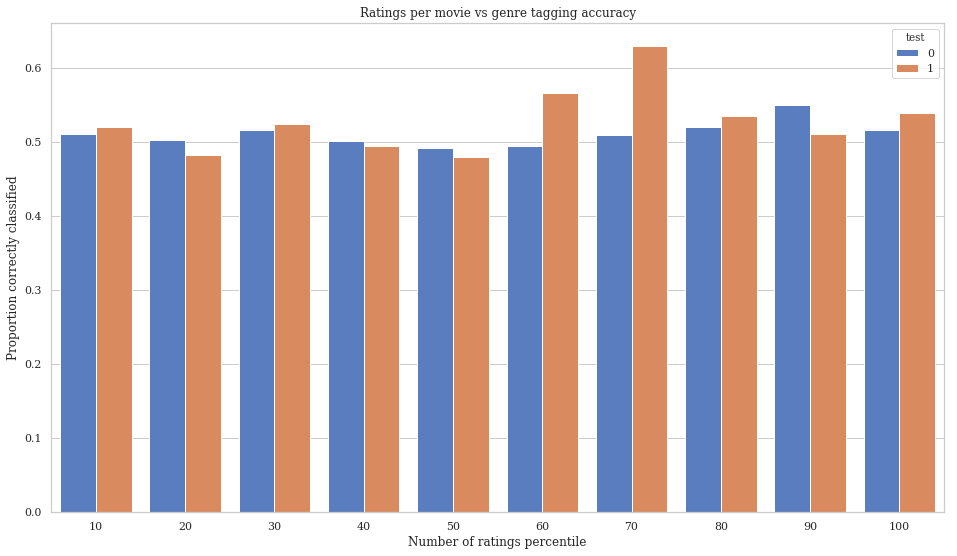

In [30]:
plt_df = df.groupby(['n_ratings_percentile','test'], as_index=False).agg({'correct':'mean', 'book_id':'count'})

g = sns.barplot(x='n_ratings_percentile', y='correct', hue='test', data=plt_df, palette='muted')
# g.set(ylim=(.5, None))
plt.ylabel('Proportion correctly classified')
plt.xlabel('Number of ratings percentile')
plt.title('Ratings per movie vs genre tagging accuracy')
plt.show()

In [31]:
df.n_ratings.describe()

count    10000.000000
mean       597.647900
std       1267.289788
min          8.000000
25%        155.000000
50%        248.000000
75%        503.000000
max      22806.000000
Name: n_ratings, dtype: float64

In [32]:
bins = [1,5,10,20,50,100,200,500,1000,5000,10000,35000]
labels = [5,10,20,50,100,200,500,1000,5000,10000,35000]
df['n_ratings_binned'] = pd.cut(df['n_ratings'], bins=bins, labels=labels, include_lowest=True)
df.head()

,book_id,original_title,language_code,adult,adult-fiction,adventure,book-club,contemporary,fantasy,fiction,...,contemporary_pred,fantasy_pred,fiction_pred,mystery_pred,romance_pred,young-adult_pred,n_ratings,correct,n_ratings_percentile,n_ratings_binned
0,4896,Second Grave on the Left,en-US,1,1,0,0,1,1,1,...,0,0,1,0,0,0,284,0,60,500
1,4782,Метро 2033,ger,1,0,1,0,1,1,1,...,0,1,1,0,0,1,138,1,20,200
2,1496,The Borrowers Afield,0,0,0,1,0,0,1,1,...,1,0,1,0,1,0,1179,0,90,5000
3,1957,Destined,eng,0,0,0,0,0,1,1,...,0,0,1,0,0,0,607,0,80,1000
4,9171,アンダーグラウンド [Andāguraundo],eng,1,0,0,1,1,0,1,...,1,0,1,0,0,0,140,1,20,200


In [34]:
plt_df = df.groupby(['n_ratings_binned','test'], as_index=False).agg({'correct':'mean', 'book_id':'count'})
plt_df['test'] = plt_df['test'].apply(lambda x: 'test' if x==1 else 'train')

g = sns.barplot(x='n_ratings_binned', y='correct', hue='test', data=plt_df, palette='muted')
g.set(ylim=(.5, None))
plt.ylabel('Accuracy')
plt.xlabel('Number of ratings per movie')
plt.title('Ratings per movie vs genre tagging accuracy')
plt.legend(loc='upper left')
# plt.savefig('figures/5_ml10m-ratings-vs-acc.pdf', bbox_inches='tight')
plt.show()

ValueError: Length of values does not match length of index

## 2. Mean rating

In [25]:
bins = list(np.arange(.5, 5.1, .5))
labels = list(np.arange(1., 5.1, .5))
df['mean_rating_binned'] = pd.cut(df['mean_rating'], bins=bins, labels=labels, include_lowest=True)
df.head()

,movieId,title,Drama,prediction,test,n_ratings,mean_rating,std_rating,correct,n_ratings_percentile,n_ratings_binned,mean_rating_binned
0,3827,"Slipper and the Rose, The (1976)",0,0,0,95,3.363158,1.247214,1,50,100,3.5
1,5666,"Journey of Natty Gann, The (1985)",0,0,0,659,3.531108,0.875721,1,80,1000,4.0
2,1877,"Last Seduction, The (1994)",1,1,0,546,3.771978,0.841974,1,80,1000,4.0
3,10407,"Wrong Man, The (1993)",0,1,0,4,2.625000,1.108678,0,10,5,3.0
4,5046,Spacehunter: Adventures in the Forbidden Zone ...,0,0,0,121,2.504132,0.936518,1,50,200,3.0


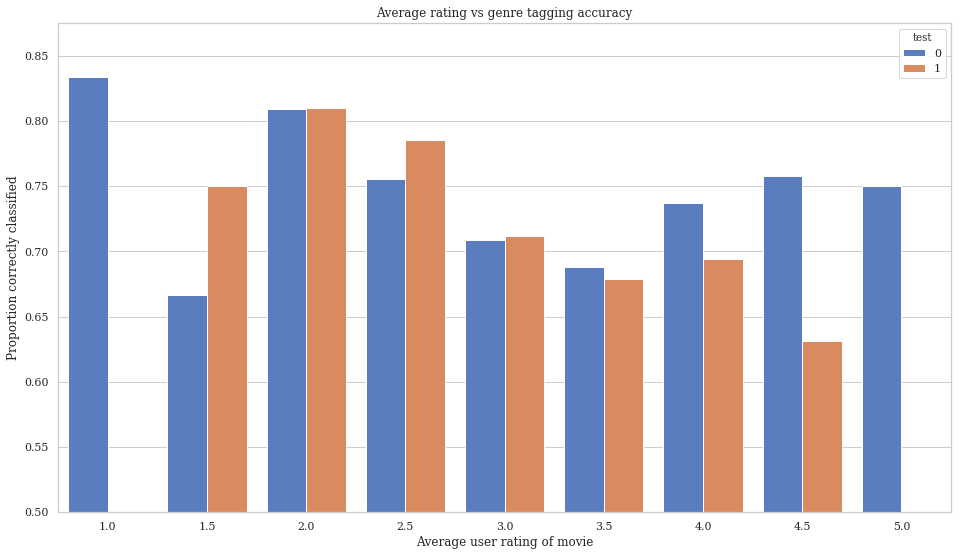

In [26]:
plt_df = df.groupby(['mean_rating_binned','test'], as_index=False).agg({'correct':'mean'})

g = sns.barplot(x='mean_rating_binned', y='correct', hue='test', data=plt_df, palette='muted')
g.set(ylim=(.5, None))
plt.ylabel('Proportion correctly classified')
plt.xlabel('Average user rating of movie')
plt.title('Average rating vs genre tagging accuracy')
plt.show()

## 3. Standard deviation of ratings

In [27]:
df.std_rating.describe()

count    10577.000000
mean         0.955582
std          0.197177
min          0.000000
25%          0.850892
50%          0.951140
75%          1.062061
max          2.474874
Name: std_rating, dtype: float64

In [28]:
bins = [0, .25, .5, .75, 1, 1.25, 1.5, 1.75, 2, 2.25, 2.5]
labels = [.25, .5, .75, 1, 1.25, 1.5, 1.75, 2, 2.25, 2.5]
df['std_rating_binned'] = pd.cut(df['std_rating'], bins=bins, labels=labels, include_lowest=True)
df.head()

,movieId,title,Drama,prediction,test,n_ratings,mean_rating,std_rating,correct,n_ratings_percentile,n_ratings_binned,mean_rating_binned,std_rating_binned
0,3827,"Slipper and the Rose, The (1976)",0,0,0,95,3.363158,1.247214,1,50,100,3.5,1.25
1,5666,"Journey of Natty Gann, The (1985)",0,0,0,659,3.531108,0.875721,1,80,1000,4.0,1.00
2,1877,"Last Seduction, The (1994)",1,1,0,546,3.771978,0.841974,1,80,1000,4.0,1.00
3,10407,"Wrong Man, The (1993)",0,1,0,4,2.625000,1.108678,0,10,5,3.0,1.25
4,5046,Spacehunter: Adventures in the Forbidden Zone ...,0,0,0,121,2.504132,0.936518,1,50,200,3.0,1.00


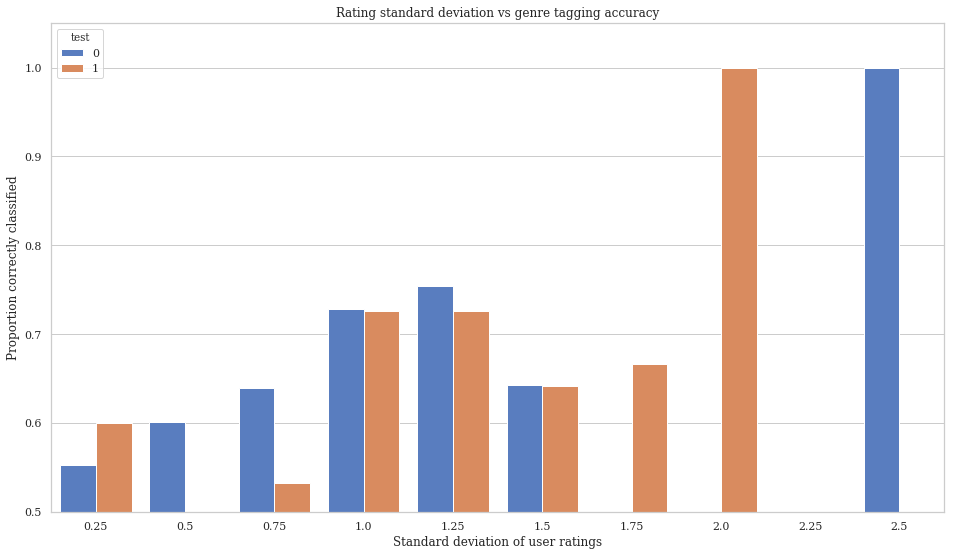

In [30]:
plt_df = df.groupby(['std_rating_binned', 'test']).agg({'correct':'mean'}).reset_index()

g = sns.barplot(x='std_rating_binned', y='correct', hue='test', data=plt_df, palette='muted')
g.set(ylim=(.5, None))
plt.ylabel('Proportion correctly classified')
plt.xlabel('Standard deviation of user ratings')
plt.title('Rating standard deviation vs genre tagging accuracy')
plt.show()